# Predicting Online  Ad Click-Through  with Logistic Regression 

### One-hot encoding of the list of dictionaries containing categorical features
#### (converting categorical feautures to numerical: one-hot encoding and ordinal encoding)

In [2]:
from sklearn.feature_extraction import DictVectorizer 
X_dict = [{'interest': 'tech', 'occupation': 'student'},
          {'interest': 'fashion', 'occupation': 'professional'},
          {'interest': 'sports', 'occupation': 'student'},
          {'interest': 'tech', 'occupation': 'student'}, 
          {'interest': 'tech', 'occupation': 'retired'},
          {'interest': 'sports', 'occupation': 'professional'}]
dict_one_hot_encoder = DictVectorizer(sparse=False) 
X_encoded = dict_one_hot_encoder.fit_transform(X_dict) 
print(X_encoded)
          

[[0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


### To see the mapping:

In [3]:
print(dict_one_hot_encoder.vocabulary_) 
{'interest=fashion': 0, 'interest=sports': 1,
'occupation=professional':3,'interest=tech':2,
'occupation=retired': 4, 'occupation=student': 5}

{'interest=tech': 2, 'occupation=student': 5, 'interest=fashion': 0, 'occupation=professional': 3, 'interest=sports': 1, 'occupation=retired': 4}


{'interest=fashion': 0,
 'interest=sports': 1,
 'occupation=professional': 3,
 'interest=tech': 2,
 'occupation=retired': 4,
 'occupation=student': 5}

In [4]:
new_dict = [{'interest': 'sports', 'occupation': 'retired'}]
new_encoded = dict_one_hot_encoder.transform(new_dict) 
print(new_encoded) 

[[0. 1. 0. 0. 1. 0.]]


#### Inverse transformation of the encoded feautures back to the original features:

In [5]:
print(dict_one_hot_encoder.inverse_transform(new_encoded))

[{'interest=sports': 1.0, 'occupation=retired': 1.0}]


#### If a new category is encountered in new data, this can be handled with DictVectorizer (needed for onehotencoder):

In [61]:
new_dict = [{'interest': 'unknown_interest', 
            'occupation': 'retired'},
             {'interest': 'tech', 'occupation': 'unseen_occupation'}]
new_encoded = dict_one_hot_encoder.transform(new_dict) 
print(new_encoded)
            

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


#### Pandas can be used to realize ordinal encoding. Ordinal encoding can be useful when you wish to transform a categorical feature
#### with *k* possible values into a numerical feature with values ranging from 1 to k.

In [62]:
import pandas as pd 
df = pd.DataFrame({'score': ['low', 'high','medium', 'medium', 'low']}) 
print(df)

    score
0     low
1    high
2  medium
3  medium
4     low


In [64]:
mapping = {'low':1, 'medium':2, 'high':3} 
df['score'] = df['score'].replace(mapping) 
print(df)


   score
0      1
1      3
2      2
3      2
4      1


C:\Users\S\AppData\Local\Temp\ipykernel_20120\3820898620.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['score'] = df['score'].replace(mapping)


# Classifying Data with Logistic Regression

#### Define the logistic function , then visualize it:

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
def sigmoid(input):
    return 1.0/ (1 + np.exp(-input))


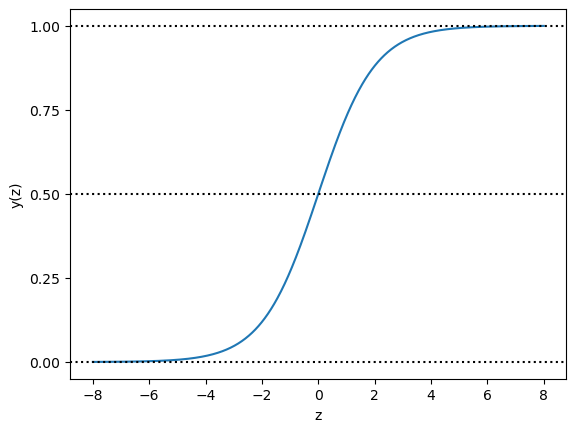

In [10]:
z = np.linspace(-8, 8, 1000) 
y = sigmoid(z) 
plt.plot(z,y) 
plt.axhline(y=0, ls='dotted', color='k') 
plt.axhline(y=0.5, ls='dotted', color='k') 
plt.axhline(y=1, ls='dotted', color='k') 
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0]) 
plt.xlabel('z') 
plt.ylabel('y(z)') 
plt.show()

## From the logistic function to Logistic Regression

#### Logistic Regression, like Naive Bayes, is a probablistic classifier. It has as its goal, the prediction of a positive sample
#### as close to 1 as possible, and a negative predition as close to 0 as posssible. This is a MSE (Mean Squared Error), the average of squares
#### for the difference between the truth and prediction. 

#### The preceding cost function is non-convex, meaning it is possible that multiple local suboptimal optimums are found, without converging 
#### to a global optimum.To overcome this , a cost-function is used that results in convex optimization (positive class  with 100% probability).

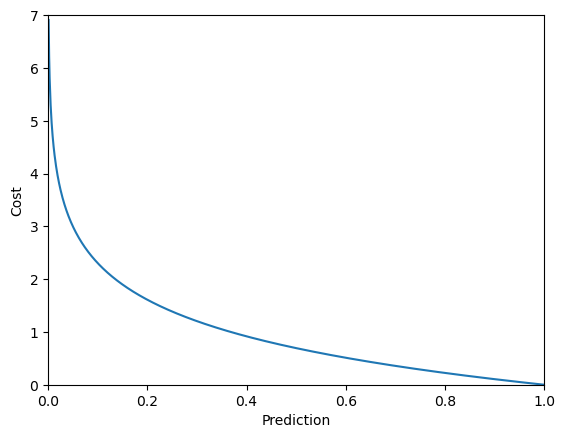

In [11]:
y_hat = np.linspace(0.001, 0.999, 1000) 
cost = -np.log(y_hat) 
plt.plot(y_hat, cost) 
plt.xlabel('Prediction') 
plt.ylabel('Cost') 
plt.xlim(0, 1) 
plt.ylim(0, 7) 
plt.show()

#### When the positive class with 0 probability , or the negative class with 100% probability is predicted, the sample cost 
####  j is 0, the cost j increases when the predicted probability "y hat" increases.  When  it can incorrectly predict 
#### there is no chance of the negative class, and the class becomes infinitely high. 

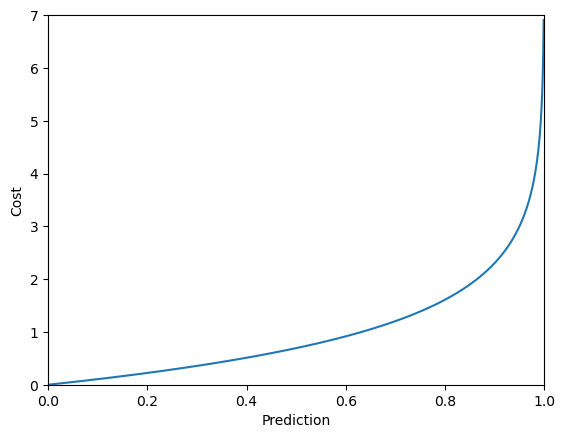

In [12]:
y_hat = np.linspace(0.001, 0.999, 1000) 
cost = -np.log(1-y_hat) 
plt.plot(y_hat, cost) 
plt.xlabel('Prediction') 
plt.ylabel('Cost') 
plt.xlim(0, 1) 
plt.ylim(0, 7) 
plt.show()

# Training a Logistic Regression Model using Gradient Descent

### First define the function that computes the prediction y_hat(x) with the current weights.

In [13]:
def compute_prediction(X, weights):
    """ 
    Compute the prediction y_hat based on current weights
    """ 
    z = np.dot(X, weights) 
    return sigmoid(z) 

In [14]:
def update_weights_gd(X_train, y_train, weights, learning_rate):

    """ 
    Update Weights by one step     
    """ 
    predictions = compute_prediction(X_train, weights) 
    weights_delta  = np.dot(X_train.T, y_train - predictions) 
    m = y_train.shape[0] 
    weights += learning_rate / float(m) * weights_delta
    return weights
    

In [15]:
def compute_cost(X, y, weights):
    """ 

    Compute the cost J(w) 
    """ 
    predictions = compute_prediction(X, weights) 
    cost = np.mean(-y * np.log(predictions) 
                -(1-y) * np.log(1 - predictions)) 
    return cost 

In [16]:
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):

    """ Train a logistic regression model
    Args:
        X_train, y_train, (numpy.ndarray, training data set) 
        max_iter (int, number of iterations) 
        learning_rate (float) 
        fit_intercept (bool, with an intercept w0 or not) 
    Returns:
        numpy.ndarray, learned weights 

    """ 

    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1)) 
        X_train = np.hstack((intercept, X_train)) 
    weights = np.zeros(X_train.shape[1]) 
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate) 

    # Check the cost for every 100 (as an example for iteration number) iterations
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights)) 
    return weights 
    

### predict the results of new inputs use the trained model 

In [17]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1)) 
        X = np.hstack((intercept, X)) 
    return compute_prediction(X, weights)

#### toy example to demonstrate implementation of Logistic Regression 

In [18]:
X_train = np.array([[6, 7], [2, 4], [3,6],[4,7],[1,6],[5,2],[2,0],[6,3],[4,1],[7,2]]) 
y_train = np.array([0, 0, 0, 0, 0, 1,1,1,1,1,])

### Train a logistic regression model for 1000 iterations at a learning rate of 0.1 based on intercept-included-weights:

In [19]:
weights = train_logistic_regression(X_train, y_train, 
                                    max_iter=1000, learning_rate=0.1, fit_intercept=True)

0.5744042371657099
0.034460223392510314
0.018265572708476157
0.012493458388041109
0.00951532913854744
0.007693388060646923
0.0064620943335143306
0.0055735118468322594
0.004901632254525041
0.004375567740665121


#### The decreasing cost indicates that the model is being optimized as a function of time. The model's performance
#### can be checked on new samples:

In [20]:
X_test = np.array([[6, 1], [1, 3], [3, 1],[4, 5]])
predictions = predict(X_test, weights) 
print(predictions)

[0.9999478  0.00743991 0.9808652  0.02080847]


#### Visualization:

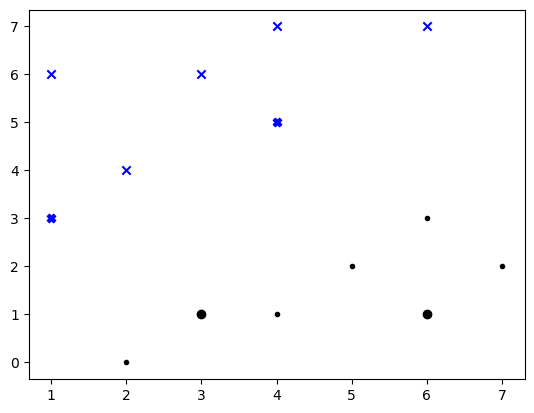

In [21]:
plt.scatter(X_train[:5,0], X_train[:5,1], c='b', marker='x') 
plt.scatter(X_train[5:,0],X_train[5:,1], c='k', marker='.') 
for i, prediction in enumerate(predictions):
    marker = 'X' if prediction < 0.5 else 'o' 
    c = 'b' if prediction < 0.5 else 'k'  
    plt.scatter(X_test[i,0], X_test[i,1], c=c, marker=marker)
    #plt.show()

## Predicting Ad Click-Through with Logistic Regression using Gradient Descent

In [22]:
import pandas as pd 
n_rows = 300000
df = pd.read_csv(r"C:\Users\S\_devrepos\PyML_by_Example\data_for_PyML_by_Ex\ch4_datasets\train.csv", nrows=n_rows) 
X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'], axis=1).values
Y = df['click'].values
n_train = 10000
X_train = X[:n_train]
Y_train = Y[:n_train] 
X_test = X[n_train:] 
Y_test = Y[n_train:]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore') 
X_train_enc = enc.fit_transform(X_train) 
X_test_enc = enc.transform(X_test)

### Train a logistic regression model over 10000 iterations, with the learning rate set to 0.01 with bias:

In [23]:
import timeit 
start_time = timeit.default_timer() 
weights = train_logistic_regression(X_train_enc.toarray(),
         Y_train, max_iter=10000, learning_rate=0.01,
         fit_intercept=True)

0.6820019456743648
0.4608619713011896
0.4503715555130051
0.4455503890097847
0.4420611414384596
0.4393702812833892
0.437228041454526
0.4354781787758496
0.43401801289720104
0.4327779028622343
0.4317091585700226
0.43077673019057455
0.4299546928842355
0.42922339559221634
0.4285676184571522
0.42797535312823465
0.4274369752561037
0.42694466897530536
0.42649201676958726
0.42607370031421204
0.42568527750493995
0.42532301300292674
0.4249837472238756
0.4246647935395447
0.4243638565943513
0.4240789667070855
0.42380842671759145
0.42355076859163654
0.42330471776471257
0.42306916368249065
0.4228431353432208
0.42262578090532044
0.4224163506180466
0.42221418248223747
0.4220186901637542
0.42182935277298567
0.42164570619560027
0.42146733571705797
0.4212938697294381
0.421124974346345
0.4209603487818472
0.4207997213740161
0.42064284615376507
0.42048949987620765
0.4203394794453518
0.4201925996741633
0.4200486913313148
0.4199075994336318
0.419769181749643
0.4196333074849702
0.4194998561247411
0.419368716411

### Using the timeit function to time the model's optimization operation.

In [24]:
print(f"--- {(timeit.default_timer() - start_time) :.3f} seconds ---")

--- 158.122 seconds ---


In [25]:
pred = predict(X_test_enc.toarray(), weights)
from sklearn.metrics import roc_auc_score 
print(f'Training smaples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}')

Training smaples: 10000, AUC on testing set: 0.703


### Using 100,000 training samples to see how it performs (n_train = 100000) and also timing it as before:

In [26]:
#import pandas as pd 
#n_rows = 300000
#df = pd.read_csv(r"C:\Users\S\_devrepos\PyML_by_Example\data_for_PyML_by_Ex\ch4_datasets\train.csv", nrows=n_rows) 
#X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'], axis=1).values
#Y = df['click'].values
#n_train = 100000
#X_train = X[:n_train]
#Y_train = Y[:n_train] 
#X_test = X[n_train:] 
#Y_test = Y[n_train:]
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore') 
#X_train_enc = enc.fit_transform(X_train) 
#X_test_enc = enc.transform(X_test)

In [27]:
#import timeit 
#start_time = timeit.default_timer() 
#weights = train_logistic_regression(X_train_enc.toarray(),
       #  Y_train, max_iter=100000, learning_rate=0.01,
       #  fit_intercept=True)

In [28]:
#print(f"--- {(timeit.default_timer() - start_time) :.3f} seconds ---")

## Training a Logistic Regression Model using Stochastic Gradient Descent(SGD) 

#### In contrast to gradient descent-based regression  models where *all* training samples are used to update the weights in every iteration, 
#### stochastic gradient descent, uses only *one* training sample for each weight update, rather than the entire training set. 
#### The model moves stepwise based on the error calculated by a single training sample. Once all samples are used, one iteration is completed. 
#### The benefit of using SGD is that it generally converges much quicker than gradient descent, making it suitable for larger training samples. 

#### To implement SGD-based regression, a slight modification to the weight_update_gd function is required:

In [45]:
def update_weights_sgd(X_train, y_train, weights, learning_rate): 
    """ One weight update iteration: moving weights by one step based on each individual sample 
    Args: 
    X_train, y_train (numpy, ndarray, training data set) 
    weights (numpy.ndarray) 
    learning_rate(float) 
    Returns:
    numpy.ndarray, updated weights 
    """ 

    for X_each, y_each in zip(X_train, y_train):
        prediction = compute_prediction(X_each, weights) 
        weights_delta = X_each.T * (y_each - prediction)
        weights += learning_rate  * weights_delta
    return weights

#### Applying Stochastic Gradient Descent (SGD) in the train_logistic_regression function

In [55]:
def train_logistic_regression_sgd(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """ Train a logistic regression model via SGD 
    Args: 
    X_train, y_train (numpy.ndarray, training data set) 
    max_iter (int, number of iterations) 
    learning_rate (float) 
    fit_intercept (bool, with an intercept w0 or not) 
    Returns: 
    numpy.ndarray, learned weights 
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train)) 
    weights = np.zeros(X_train.shape[1]) 
    for iteration in range(max_iter):
        weights = update_weights_sgd(X_train, y_train, weights, learning_rate) 

        # Checking the cost for every 2 (for example) iterations
        if iteration % 2 == 0:
            print(compute_cost(X_train, y_train, weights)) 
    return weights
    
    
    

#### Checking the operation time of SGD with 100,000 training samples , with 10 iterations and a learning rate of 0.01.
#### Then printing out the current costs for every other iteration:

In [65]:

# Train the SGD model based on 100000 samples
n_train = 100000
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)

X_test_enc = enc.transform(X_test)

start_time = timeit.default_timer()
weights = train_logistic_regression_sgd(X_train_enc.toarray(), Y_train, max_iter=10, learning_rate=0.01,
                                        fit_intercept=True)
print(f"--- {(timeit.default_timer() - start_time):.3f} seconds ---")
pred = predict(X_test_enc.toarray(), weights)
print(f'Training samples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}')





0.41278648596257944
0.4078504597223988
0.40545733114863264
0.403811787845451
0.4025431351250833
--- 14.281 seconds ---
Training samples: 100000, AUC on testing set: 0.732


In [68]:
# Using scikit-learn
from sklearn.linear_model import SGDClassifier
sgd_lr = SGDClassifier(loss='log_loss', penalty=None, fit_intercept=True, max_iter=20, learning_rate='constant', eta0=0.01)
sgd_lr.fit(X_train_enc.toarray(), Y_train) 
pred = sgd_lr.predict_proba(X_test_enc.toarray())[:, 1]
print(f'Training samples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}')
                       

Training samples: 100000, AUC on testing set: 0.731


### Training and testing the model

In [69]:
sgd_lr.fit(X_train_enc.toarray(), Y_train) 
pred = sgd_lr.predict_proba(X_test_enc.toarray())[:, 1]
print(f'Training samples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}')

Training samples: 100000, AUC on testing set: 0.727


### Feature Selection using L1 Regularization

In [79]:
sgd_lr_l1 = SGDClassifier(loss='log_loss',
                          penalty='l1',
                          alpha=0.0001,
                          fit_intercept=True,
                          max_iter=10,
                          learning_rate='constant',
                          eta0=0.01,
                          random_state=42)
sgd_lr_l1.fit(X_train_enc.toarray(), Y_train)

SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss', max_iter=10,
              penalty='l1', random_state=42)

#### With the trained model , the absolute values of its coefficients are obtained:

In [80]:
coef_abs = np.abs(sgd_lr_l1.coef_)
print(coef_abs)


[[0.         0.16654682 0.         ... 0.         0.         0.12803394]]


#### The bottom 10 coefficients and their values can be printed out:

In [89]:
print(np.sort(coef_abs)[0][:10])
bottom_10 = np.argsort(coef_abs)[0][:10]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### We can see what these 10 features are using in this manner:

In [90]:
feature_names = enc.get_feature_names_out() 
bottom_10 = np.argsort(coef_abs)[0][:10]
print('10 least important features are:\n', feature_names[bottom_10])


10 least important features are:
 ['x0_1001' 'x8_84c2f017' 'x8_84ace234' 'x8_84a9d4ba' 'x8_84915a27'
 'x8_8441e1f3' 'x8_840161a0' 'x8_83fbdb80' 'x8_83fb63cd' 'x8_83ed0b87']


#### In a similar fashion we can see the top 10 coefficients and their values:

In [91]:
top_10 = np.argsort(coef_abs)[0][-10:]
print('10 most important features are:\n', feature_names[top_10])

10 most important features are:
 ['x4_28905ebd' 'x3_7687a86e' 'x18_61' 'x18_15' 'x5_5e3f096f' 'x5_9c13b419'
 'x2_763a42b5' 'x3_27e3c518' 'x2_d9750ee7' 'x5_1779deee']


## Feature Selection using Random Forest

#### The trained RandomForestClassifier in Scikitlearn comes with an attribute, feature_importances_, which indicates 
#### the feature importance that is calculated as the proportion of occurrences in tree nodes. 
### using 100,000 ad click samples we get:

In [92]:
from sklearn.ensemble import RandomForestClassifier 
random_forest = RandomForestClassifier(n_estimators=100, 
                                       criterion='gini', min_samples_split=30, n_jobs=-1) 
random_forest.fit(X_train_enc.toarray(),Y_train)

RandomForestClassifier(min_samples_split=30, n_jobs=-1)

#### After fitting the random forest model, we get the following feature importance scores:

In [109]:
feature_imp = random_forest.feature_importances_
print(feature_imp)

[1.62882645e-05 1.20413413e-03 1.18461781e-03 ... 6.26667623e-04
 4.99709179e-04 8.10215256e-03]


#### The bottom 10 feature scores and the corresponding 10 least important features:

In [110]:
bottom_10 = np.argsort(feature_imp)[:10] 
print('10 least important features are:\n', feature_names[bottom_10])

10 least important features are:
 ['x11_13780' 'x2_0865bdcb' 'x3_aebf429f' 'x2_09604652' 'x8_feba401a'
 'x5_ce703ce9' 'x2_0c6adf5c' 'x11_12203' 'x8_a496f117' 'x5_31e6dbd8']


#### Looking at the top 10 feature scores and corresponding top 10 most important features we get:

In [113]:
top_10 = np.argsort(feature_imp)[-10:]
print('10 most important features are:\n', feature_names[top_10])

10 most important features are:
 ['x18_157' 'x16_1063' 'x17_-1' 'x3_98572c79' 'x8_8a4875bd' 'x18_33'
 'x12_300' 'x14_1993' 'x2_d9750ee7' 'x15_2']
